In [1]:
import pandas as pd

In [2]:
final_data = pd.read_csv("full_data.csv",index_col=0)
final_data.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,Max_temp,Precip,Humidity,Heat_Index,Latitude_y,Longitude_y,Elevation,review_neg,review_neu,review_pos
0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,114.0,37.43,70.76,109.6,45.505794,-122.781770,126.0,0.053,0.947,0.000
1,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,109.5,33.85,74.73,113.8,43.956731,-123.279126,216.0,0.000,0.805,0.195
2,US,This bright and spicy wine refreshes with pala...,NaN,90,16.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,109.5,33.85,74.73,113.8,43.956731,-123.279126,216.0,0.000,0.909,0.091


In [3]:
NLP_data = final_data.loc[:, ["description","points"]]
NLP_data.head(3)

,description,points
0,"Tart and snappy, the flavors of lime flesh and...",87
1,"Much like the regular bottling from 2012, this...",87
2,This bright and spicy wine refreshes with pala...,90


In [4]:
# Sentiment Analysis
import nltk

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\itsme\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np
def get_sentiment(data, col):
    sentiment_analyzer = SentimentIntensityAnalyzer()

    # Applying Model, Variable Creation
    data['polarity_score']=data[col].apply(lambda x:sentiment_analyzer.polarity_scores(x)['compound'])
    data['review_neu']=data[col].apply(lambda x:sentiment_analyzer.polarity_scores(x)['neu'])
    data['review_neg']=data[col].apply(lambda x:sentiment_analyzer.polarity_scores(x)['neg'])
    data['review_pos']=data[col].apply(lambda x:sentiment_analyzer.polarity_scores(x)['pos'])

    data['sentiment']= np.nan
    data.loc[data.polarity_score>0,'sentiment']='Positive'
    data.loc[data.polarity_score==0,'sentiment']='Neutral'
    data.loc[data.polarity_score<0,'sentiment']= 'Negative'
    return data

NLP_data = get_sentiment(data = NLP_data, col = 'description')

In [6]:
NLP_data

,description,points,polarity_score,review_neu,review_neg,review_pos,sentiment
0,"Tart and snappy, the flavors of lime flesh and...",87,-0.1280,0.947,0.053,0.000,Negative
1,"Much like the regular bottling from 2012, this...",87,0.8176,0.805,0.000,0.195,Positive
2,This bright and spicy wine refreshes with pala...,90,0.4404,0.909,0.000,0.091,Positive
3,"Full-bodied and forward, this offers fruit fla...",87,-0.3906,0.873,0.127,0.000,Negative
4,This estate-grown Pinot is still pretty rough ...,85,0.4939,0.894,0.000,0.106,Positive
...,...,...,...,...,...,...,...
49775,"Good grip is immediately apparent, along with ...",90,0.8979,0.736,0.000,0.264,Positive
49776,"Bone dry, delicately structured and crisp in a...",87,0.5908,0.824,0.043,0.133,Positive
49777,"Very ripe, soft and sugary sweet, this Cab has...",86,0.4738,0.806,0.058,0.136,Positive
49778,Hailing from one of the more popular vineyards...,90,-0.6327,0.879,0.091,0.030,Negative


Text(0.5, 0, 'Sentiment Label')

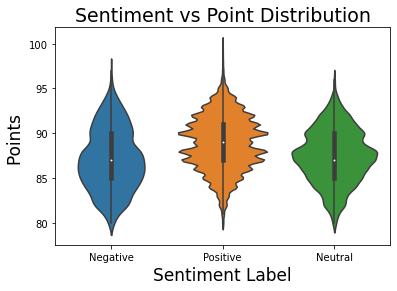

In [7]:
import seaborn as sns
import numpy as np
a = sns.violinplot(data=NLP_data, x="sentiment", y="points")
a.set_title("Sentiment vs Point Distribution", fontsize=19)
a.set_ylabel("Points ", fontsize=17)
a.set_xlabel("Sentiment Label", fontsize=17)

In [8]:
final_data[['review_neg', 'review_neu', 'review_pos']] = NLP_data[['review_neg','review_neu', 'review_pos']]
final_data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,Max_temp,Precip,Humidity,Heat_Index,Latitude_y,Longitude_y,Elevation,review_neg,review_neu,review_pos
0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,114.0,37.43,70.76,109.6,45.505794,-122.781770,126.0,0.053,0.947,0.000
1,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,109.5,33.85,74.73,113.8,43.956731,-123.279126,216.0,0.000,0.805,0.195
2,US,This bright and spicy wine refreshes with pala...,NaN,90,16.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,109.5,33.85,74.73,113.8,43.956731,-123.279126,216.0,0.000,0.909,0.091
3,US,"Full-bodied and forward, this offers fruit fla...",Vintner's Reserve,87,45.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,109.5,33.85,74.73,113.8,43.956731,-123.279126,216.0,0.127,0.873,0.000
4,US,This estate-grown Pinot is still pretty rough ...,NaN,85,25.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,109.5,33.85,74.73,113.8,43.956731,-123.279126,216.0,0.000,0.894,0.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49775,US,"Good grip is immediately apparent, along with ...",NaN,90,28.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,114.9,38.28,67.36,109.2,45.487158,-122.647687,19.0,0.000,0.736,0.264
49776,US,"Bone dry, delicately structured and crisp in a...",Salem Ranch,87,18.0,California,Dry Creek Valley,Sonoma,NaN,NaN,...,113.9,14.36,61.08,106.6,38.563743,-121.472333,7.0,0.043,0.824,0.133
49777,US,"Very ripe, soft and sugary sweet, this Cab has...",NaN,86,60.0,California,Diamond Mountain District,Napa,NaN,NaN,...,109.9,18.41,72.94,106.9,38.543345,-122.578433,638.0,0.058,0.806,0.136
49778,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,...,97.7,20.20,74.93,93.8,36.974426,-122.027795,8.0,0.091,0.879,0.030


In [9]:
final_data.to_csv(path_or_buf='full_data.csv')